In [2]:
#%pip install ipywidgets
#%pip install pandas-profiling
#%pip install sweetviz
#%pip install autoviz
#%pip install dtale
#%pip install umap-learn

In [1]:
import pandas as pd
#import sweetviz #usado mais pra dados rotulados
import numpy as np
import dtale
import umap.umap_ as umap
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

D:\Pessoais\AnacondaFiles\envs\teste_with_gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
rootPath = "C:\\Users\\mlb\\Teste_VOCs\\DataFiles"
columnsName = ["0","1","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade"]
columnsName2 = ["index","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade","culture_day","c_type"]

In [6]:
#Load albicans file data
#data dictionary
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6

df_albicans     = pd.read_csv(rootPath+"\\albicans.csv", delim_whitespace=True, header=None, names=columnsName)
df_albicans     = df_albicans.drop(["0","1"], axis=1)
df_albicans.dropna(inplace=True)
df_albicans.reset_index(drop=True, inplace=True)
df_albicans['c_type'] = 1
df_albicans['culture_day'] = 1

df_albican2     = pd.read_csv(rootPath+"\\albicans2.csv", delim_whitespace=True, header=None, names=columnsName)
df_albican2     = df_albican2.drop(["0","1"], axis=1)
df_albican2.dropna(inplace=True)
df_albican2.reset_index(drop=True, inplace=True)
df_albican2['c_type'] = 1
df_albican2['culture_day'] = 1

df_albican3     = pd.read_csv(rootPath+"\\albicans3.csv", delim_whitespace=True, header=None, names=columnsName)
df_albican3     = df_albican3.drop(["0","1"], axis=1)
df_albican3.dropna(inplace=True)
df_albican3.reset_index(drop=True, inplace=True)
df_albican3['c_type'] = 1
df_albican3['culture_day'] = 1

df_albican_dia2 = pd.read_csv(rootPath+"\\albican_dia2.csv", delim_whitespace=True, header=None, names=columnsName)
df_albican_dia2 = df_albican_dia2.drop(["0","1"], axis=1)
df_albican_dia2.dropna(inplace=True)
df_albican_dia2.reset_index(drop=True, inplace=True)
df_albican_dia2['c_type'] = 1
df_albican_dia2['culture_day'] = 2

In [7]:
df_albicans.head()

,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
0,1.623161e+09,91720.0,7305.0,6014.0,63460.0,4294.0,40700.0,8005.0,60.66,100.22,12.59,1,1
1,1.623161e+09,91910.0,7305.0,6020.0,63380.0,4293.0,40730.0,7998.0,60.71,100.15,12.52,1,1
2,1.623161e+09,91190.0,7305.0,6020.0,63460.0,4294.0,40750.0,7998.0,60.70,100.19,12.56,1,1
3,1.623161e+09,92380.0,7305.0,6020.0,64470.0,4319.0,40770.0,7998.0,60.69,83.83,12.60,1,1
4,1.623161e+09,35120.0,7305.0,7841.0,64730.0,2047.0,16630.0,7032.0,60.62,74.81,11.56,1,1


In [8]:
def createInstance(df):
    lastIndex = 0
    newDf = pd.DataFrame(columns=["timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade","c_type"])
    for row in range(len(df)):
        if np.isnan(df.iloc[row, 0]):
            newDf = newDf.append(df.iloc[lastIndex:row,].mean(axis = 0),ignore_index=True) 
            lastIndexstIndex = row+1
    return newDf
#newDf = createInstance(df_albicans)

In [9]:
import dtale
d = dtale.show(df_albicans)
d.open_browser()

In [10]:
df_albicans.describe()

,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
count,2.397000e+03,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.0,2397.0
mean,1.623162e+09,41907.809762,46328.254068,22100.360868,38217.067167,328.192073,1212.994451,3459.093033,60.338890,76.947776,10.111081,1.0,1.0
std,6.176433e+02,15293.819722,12681.714424,6082.827873,8612.977747,206.700153,1735.311501,1229.093374,1.146919,21.332008,2.578371,0.0,0.0
min,1.623161e+09,15310.000000,7305.000000,6014.000000,21510.000000,156.900000,575.800000,1810.000000,57.890000,53.770000,6.800000,1.0,1.0
25%,1.623161e+09,30390.000000,33010.000000,17430.000000,31830.000000,226.000000,730.300000,2454.000000,59.300000,53.960000,7.220000,1.0,1.0
50%,1.623162e+09,37190.000000,50310.000000,19890.000000,37230.000000,268.900000,907.100000,2901.000000,60.690000,74.140000,10.460000,1.0,1.0
75%,1.623163e+09,55340.000000,58380.000000,29190.000000,43700.000000,410.900000,1446.000000,4697.000000,61.300000,100.110000,12.770000,1.0,1.0
max,1.623163e+09,92380.000000,63300.000000,30460.000000,64730.000000,4319.000000,40770.000000,8005.000000,62.070000,100.260000,13.360000,1.0,1.0


In [11]:
#Join the albicans dataframes
frames  = [df_albicans,df_albican2, df_albican3, df_albican_dia2]
df_albicans_joined = pd.concat(frames)
df_albicans_joined.reset_index(inplace=True)
df_albicans_joined

,index,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
0,0,1.623161e+09,91720.0,7305.0,6014.0,63460.0,4294.0,40700.0,8005.0,60.66,100.22,12.59,1,1
1,1,1.623161e+09,91910.0,7305.0,6020.0,63380.0,4293.0,40730.0,7998.0,60.71,100.15,12.52,1,1
2,2,1.623161e+09,91190.0,7305.0,6020.0,63460.0,4294.0,40750.0,7998.0,60.70,100.19,12.56,1,1
3,3,1.623161e+09,92380.0,7305.0,6020.0,64470.0,4319.0,40770.0,7998.0,60.69,83.83,12.60,1,1
4,4,1.623161e+09,35120.0,7305.0,7841.0,64730.0,2047.0,16630.0,7032.0,60.62,74.81,11.56,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14360,7188,1.623278e+09,41270.0,29990.0,28800.0,22380.0,442.0,1548.0,4693.0,61.37,54.39,6.21,1,2
14361,7189,1.623278e+09,41090.0,29990.0,28820.0,22420.0,440.8,1549.0,4695.0,61.38,54.35,6.10,1,2
14362,7190,1.623278e+09,41110.0,29990.0,28830.0,22440.0,441.4,1550.0,4696.0,61.38,54.39,6.15,1,2
14363,7191,1.623278e+09,41190.0,29990.0,28830.0,22540.0,442.6,1552.0,4696.0,61.39,54.47,6.27,1,2


In [12]:
#Generate new datasets
df_albicans_joined.to_csv(r'DatasetsJoined\AllAlbicansCollect.csv', index = False)
df_albicans.to_csv(r'NewDatasets\NewAlbicans.csv', index = False)
df_albican2.to_csv(r'NewDatasets\NewAlbicans2.csv', index = False)
df_albican3.to_csv(r'NewDatasets\NewAlbicans3.csv', index = False)
df_albican_dia2.to_csv(r'NewDatasets\NewAlbican_dia2.csv', index = False)

In [13]:
d = dtale.show(df_albicans_joined)
d.open_browser()

In [26]:
d = dtale.show(df_albicans_joined.drop(columns=['c_type','index']))
d.open_browser()

Executing shutdown due to inactivity...


2021-06-30 21:06:22,079 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-06-30 21:06:38,465 - INFO     - Executing shutdown...
D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\dtale\app.py:397: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [14]:
albicans_data = df_albicans_joined.drop(columns=['c_type','timestamp'])
scaled_albicans_df = pd.DataFrame(data=StandardScaler().fit_transform(albicans_data), columns=df_albicans_joined.drop(columns=['c_type','timestamp']).columns)
scaled_albicans_df

,index,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,culture_day
0,-1.223600,4.205164,-2.974673,-2.490778,4.253569,27.499466,41.818373,3.801634,-1.119540,1.106121,1.254705,-1.001463
1,-1.223089,4.218677,-2.974673,-2.489823,4.243649,27.492545,41.850060,3.795918,-1.088522,1.102803,1.228130,-1.001463
2,-1.222579,4.167468,-2.974673,-2.489823,4.253569,27.499466,41.871185,3.795918,-1.094725,1.104699,1.243316,-1.001463
3,-1.222069,4.252105,-2.974673,-2.489823,4.378811,27.672502,41.892309,3.795918,-1.100929,0.329360,1.258502,-1.001463
4,-1.221558,0.179554,-2.974673,-2.200013,4.411051,11.947056,16.394983,3.007170,-1.144355,-0.098120,0.863661,-1.001463
...,...,...,...,...,...,...,...,...,...,...,...,...
14360,2.445400,0.616966,-1.195161,1.135581,-0.840405,0.838191,0.464963,1.097354,-0.679079,-1.065872,-1.167492,0.998539
14361,2.445910,0.604163,-1.195161,1.138764,-0.835445,0.829885,0.466019,1.098987,-0.672876,-1.067768,-1.209254,0.998539
14362,2.446421,0.605586,-1.195161,1.140355,-0.832965,0.834038,0.467075,1.099804,-0.672876,-1.065872,-1.190272,0.998539
14363,2.446931,0.611276,-1.195161,1.140355,-0.820565,0.842343,0.469188,1.099804,-0.666672,-1.062081,-1.144713,0.998539


In [15]:
d = dtale.show(scaled_albicans_df)
d.open_browser()

In [16]:
reducer = umap.UMAP()

In [17]:
#Usa os dados reescalonados para a redução de dimensionalidade
embedding = reducer.fit_transform(scaled_albicans_df)
embedding.shape

(14365, 2)

Text(0.5, 1.0, 'UMAP projection of the C. Albicans dataset')

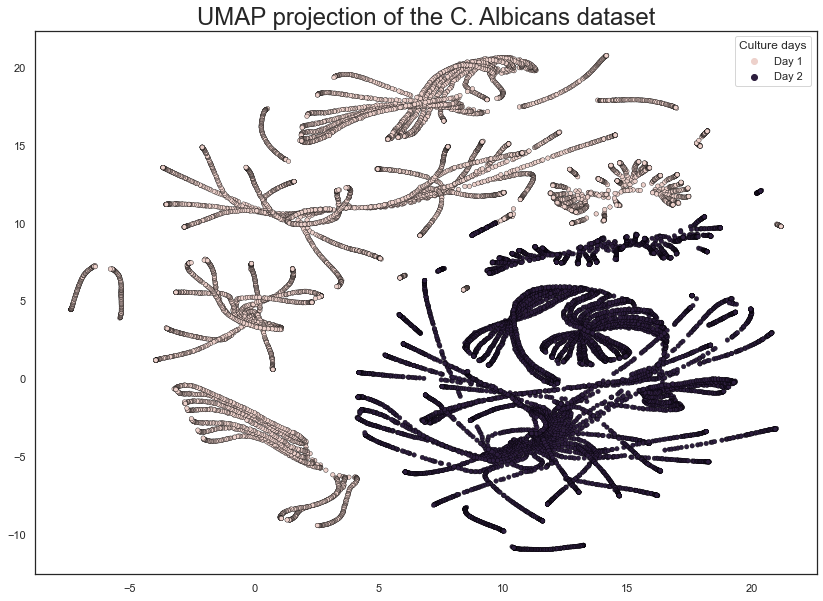

In [18]:
ax = sns.scatterplot(data=embedding, x=embedding[:, 0], y=embedding[:, 1],cmap="RdYlGn_r", s=20, ec='black',  hue=df_albicans_joined.culture_day)
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ["Day 1", "Day 2"], loc='upper right', title="Culture days")
plt.title('UMAP projection of the C. Albicans dataset', fontsize=24)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_albicans_df)
result = pd.DataFrame(data = principalComponents
             , columns = ['PCA0', 'PCA1','PCA2'])

In [20]:
result

,PCA0,PCA1,PCA2
0,21.143621,7.527247,41.102070
1,21.155265,7.513266,41.116909
2,21.138971,7.514748,41.138933
3,21.462715,7.574254,41.046241
4,8.882495,4.940845,17.227501
...,...,...,...
14360,2.903288,-2.279951,-0.187664
14361,2.910714,-2.286459,-0.197833
14362,2.906442,-2.283281,-0.190088
14363,2.892265,-2.273687,-0.168866


Text(0.5, 0.92, 'PCA projection of the C. Albicans dataset')

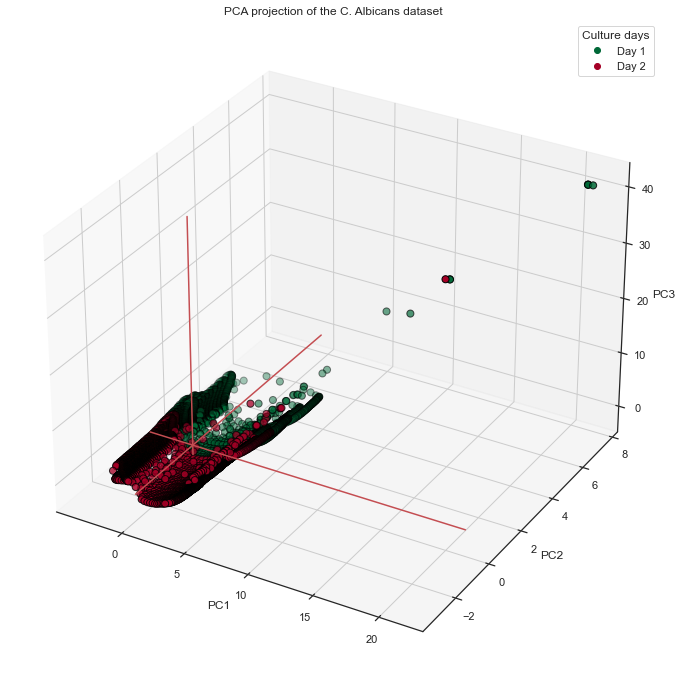

In [21]:
fig = plt.figure(figsize=[15,12])

ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=df_albicans_joined.culture_day, cmap="RdYlGn_r", s=50, ec='black')
handles, labels = scatter.legend_elements()
legend2 = ax.legend(handles, ["Day 1","Day 2"], loc="upper right", title="Culture days")

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA projection of the C. Albicans dataset")

In [22]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(scaled_albicans_df)
result2 = pd.DataFrame(data = principalComponents2
             , columns = ['PCA0', 'PCA1'])

In [23]:
result2

,PCA0,PCA1
0,21.143621,7.527247
1,21.155265,7.513266
2,21.138971,7.514748
3,21.462715,7.574254
4,8.882495,4.940845
...,...,...
14360,2.903288,-2.279951
14361,2.910714,-2.286459
14362,2.906442,-2.283281
14363,2.892265,-2.273687


Text(0.5, 1.0, 'PCA projection of the C. Albicans dataset')

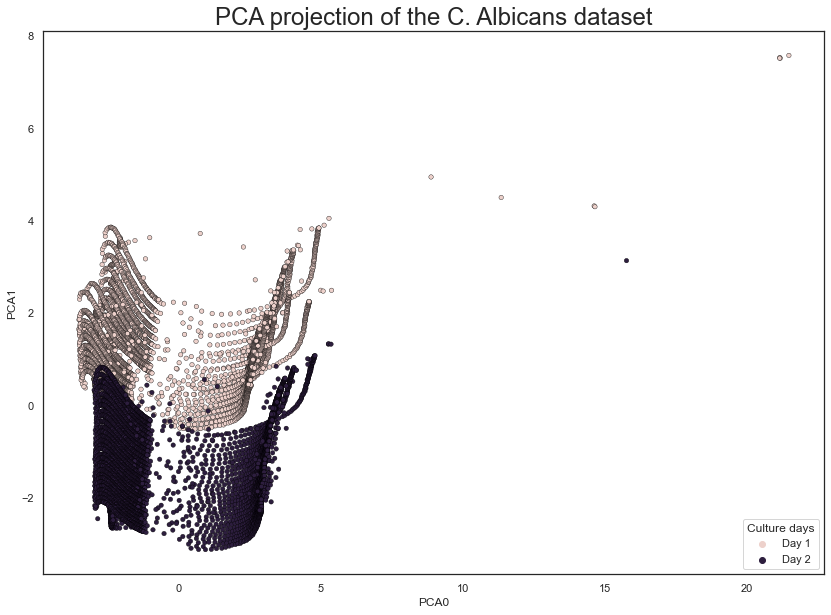

D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning:

invalid value encountered in true_divide

D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning:

invalid value encountered in true_divide



In [24]:
ax = sns.scatterplot(data=result2, x=result2['PCA0'], y=result2['PCA1'],cmap="RdYlGn_r", s=20, ec='black',  hue=df_albicans_joined.culture_day)
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ["Day 1", "Day 2"], loc='lower right', title="Culture days")
plt.title('PCA projection of the C. Albicans dataset', fontsize=24)